# Chapitre 1 : Introduction au Machine Learning 

## I- Généralités

### I.1. Définition 

" A computer program is said to learn from experience E  with respect to some class of tasks T and performance measure P, if its performance at the tasks improves with the experiences." (Mitchell, 1997)

**Exemple**:

* Tache T : Classifier des emails reçus durant une journée
* Performance P : Taux de rejet correct des spams par S
* Expérience E : 1 semaine d'exposition aux courriels d’un utilisateur

### I.2. Types d'apprentissage

* Apprentissage supervisé:
   * Apprentissage sur un ensemble d’exemples étiquetés (xi, yi)


* Apprentissage non supervisé :
  * Apprentissage sur un ensemble d’exemples non étiquetés xi (cf. clustering)


* Apprentissage semi-supervisé :
  * Apprentissage sur un ensemble d’exemples étiquetés / non étiquetés
  

* Apprentissage par renforcement :
   * Apprentissage où les actions sur l’environnement se mesurent par une récompense

### I.3. Les algorithmes

Les algorithmes ne sont pas tous destinés aux mêmes usages. On les classe usuellement selon deux composantes:

* Le mode d'apprentissage : on distingue les algorithmes supervisés des algorithmes non supervisés
* Le type de problème à traiter : on distingue les algorithmes de régression  de ceux de classification.

**Exemples d'algorithmes:** Régression linéaire uni/multivariée, Régression polynomiale, Régression régularisée, Naive Bayes, Regression logistique, Clustering hiérarchique, Clustering non hiérarchique, Arbres de décision, Forêt aléatoire, SVM, etc.

## II. Les Algorithmes de base

#### II.1. Algorithmes des K-plus proches voisins (k Nearest Neighbors – kNN)

L’algorithme des k plus proches voisins est un algorithme d’apprentissage supervisé, il est nécessaire d’avoir des données labellisées. À partir d’un ensemble E de données labellisées, il sera possible de classer (déterminer le label) d’une nouvelle donnée (donnée n’appartenant pas à E). 

**L’algorithme kNN**
1. Charger les données
2. Initialiser k au nombre de plus proches voisins choisi
3. Pour chaque exemple dans les données:
  * Calculer la distance entre notre requête et l’observation itérative actuelle de la boucle depuis les données.
  * Ajouter la distance et l’indice de l’observation concernée à une collection ordonnée de données
4. Trier cette collection ordonnée contenant distances et indices de la plus petite distance à la plus grande (dans ordre croissant).
5. Sélectionner les k premières entrées de la collection de données triées (équivalent aux k plus proches voisins)
6. Obtenir les étiquettes des k entrées sélectionnées
7. Si régression, retourner la moyenne des k étiquettes
8. Si classification, retourner le mode (valeur la plus fréquente/commune) des k étiquettes

#### Exemple d'étude

**Les données** :  AirBnB
* `host_response_rate`: le taux de réponse de l'hôte
* `host_acceptance_rate`: nombre de requêtes à l'hôte qui se convertissent en locations
* `host_listings_count`: nombre d'autres listes que possède l'hôte 
* `latitude`:  latitude des coordonnées géographiques
* `longitude`: longitude des coordonnées
* `city`: la ville dans laquelle réside l'espace de vie
* `zipcode`: le code postal de la pièce
* `state`: l'Etat dans lequel réside l'espace 
* `accommodates`: le nombre de personnes pouvant être accueillies
* `room_type`: le type d'espace de vie (chambre privée, chambre partagée ou maison / appartement entier
* `bedrooms`: nombre de chambres incluses dans la location
* `bathrooms`: nombre de salles de bain comprises dans la location
* `beds`: nombre de lits inclus dans la location
* `price`: prix par nuit pour la location
* `cleaning_fee`: frais supplémentaires utilisés pour nettoyer  après le départ du client
* `security_deposit`: dépôt de garantie remboursable, en cas de dommages
* `minimum_nights`: nombre minimum de nuits qu'un invité peut rester pour la location
* `maximum_nights`: nombre maximum de nuits qu'un invité peut rester pour la location
* `number_of_reviews`: nombre d'avis que les clients précédents ont laissés


In [1]:
import pandas as pd
dc_listings = pd.read_csv('dc_airbnb.csv')
dc_listings.head()
#print(dc_listings.loc[0])

,host_response_rate,host_acceptance_rate,host_listings_count,accommodates,room_type,bedrooms,bathrooms,beds,price,cleaning_fee,security_deposit,minimum_nights,maximum_nights,number_of_reviews,latitude,longitude,city,zipcode,state
0,92%,91%,26,4,Entire home/apt,1.0,1.0,2.0,$160.00,$115.00,$100.00,1,1125,0,38.890046,-77.002808,Washington,20003,DC
1,90%,100%,1,6,Entire home/apt,3.0,3.0,3.0,$350.00,$100.00,NaN,2,30,65,38.880413,-76.990485,Washington,20003,DC
2,90%,100%,2,1,Private room,1.0,2.0,1.0,$50.00,NaN,NaN,2,1125,1,38.955291,-76.986006,Hyattsville,20782,MD
3,100%,NaN,1,2,Private room,1.0,1.0,1.0,$95.00,NaN,NaN,1,1125,0,38.872134,-77.019639,Washington,20024,DC
4,92%,67%,1,4,Entire home/apt,1.0,1.0,1.0,$50.00,$15.00,$450.00,7,1125,0,38.996382,-77.041541,Silver Spring,20910,MD


**Position du Problème :** 

Un des défis auxquels sont confrontés les propriétaires qui cherchent à louer leur maison est de déterminer le prix optimal de location  par nuit. Dans de nombreux domaines, les locataires sont présentés avec une bonne sélection d'annonces et peuvent filtrer sur des critères tels que le prix, le nombre de chambres, le type de chambre et plus encore. Étant donné qu'AirBnB est un marché, le montant qu'un  propriétaire  peut facturer chaque nuit est étroitement lié à la dynamique du marché. 

En tant que  propriétaire, si nous essayons de facturer au-dessus du prix du marché pour une maison que nous aimerions faire louer, les locataires choisiront des alternatives plus abordables similaires aux nôtres. Si nous fixons notre prix de location à la nuit trop bas, nous manquerons de revenus potentiels.

Une **stratégie** que nous pourrions utiliser est de:

 * trouver quelques annonces similaires aux nôtres,
 * Calculer la moyenne du prix indiqué pour ceux qui ressemblent le plus au nôtre,
 * fixer notre prix à ce prix moyen calculé.

Cette stratégie est celle de **K- plus proches voisins**. Deux choix sont à opérer:

* La mesure de similarité
* Le choix de k


La **distance euclidienne** est utilisée pour établir la similarité. 

**Calcul de la distance pour la première observation**

In [2]:
import numpy as np
our_acc_value = 3
first_living_space_value = dc_listings.loc[0]['accommodates']
first_distance = np.abs(first_living_space_value - our_acc_value)
print(first_distance)

1


**Calcul pour toutes les observations**

In [3]:
new_listing = 3
dc_listings['distance'] = dc_listings['accommodates'].apply(lambda x: np.abs(x - new_listing))
print(dc_listings['distance'].value_counts())

1     2294
2      503
0      461
3      279
5       73
4       35
7       22
6       17
9       12
13       8
8        7
12       6
11       4
10       2
Name: distance, dtype: int64


In [4]:
print(dc_listings[dc_listings["distance"] == 0]["accommodates"])

26      3
34      3
36      3
40      3
44      3
       ..
3675    3
3697    3
3707    3
3714    3
3722    3
Name: accommodates, Length: 461, dtype: int64


Le choix des k plus proches voisins est influencé dans ce cas par l'ordre d'apparition dans la base. Pour un choix aléatoire, on a:

In [5]:
import numpy as np
np.random.seed(1)
dc_listings = dc_listings.loc[np.random.permutation(len(dc_listings))]
dc_listings = dc_listings.sort_values('distance')
print(dc_listings.iloc[0:10]['price'])

577     $185.00
2166    $180.00
3631    $175.00
71      $128.00
1011    $115.00
380     $219.00
943     $125.00
3107    $250.00
1499     $94.00
625     $150.00
Name: price, dtype: object


**Nettoyage de la colonne `price`** : enlever la virgule, le symbole dollar, transformer en floattant.

In [6]:
stripped_commas = dc_listings['price'].str.replace(',', '')
stripped_dollars = stripped_commas.str.replace('$', '')
dc_listings['price'] = stripped_dollars.astype('float')
mean_price = dc_listings.iloc[0:5]['price'].mean()
print(mean_price)

156.6


**Quelques éléments de syntaxe**

* Randomiser l'ordre d'un DataFrame:

`import numpy as np
np.random.seed(1)
np.random.permutation(len(dc_listings))`

* Mélange de DataFrame:

`dc_listings = dc_listings.loc[np.random.permutation(len(dc_listings))]`

* Applying string methods to replace a comma with an empty character:

`stripped_commas = dc_listings['price'].str.replace(',', '')`

* Conversion des objets Series en float:

`dc_listings['price'] = dc_listings['price'].astype('float')`

**Exercice**:

Écrire une fonction plus générale qui peut suggérer le prix optimal pour d'autres valeurs de la colonne `accommodates`. Le Dataframe `dc_listings` contient des informations spécifiques à notre espace de vie, par ex. la colonne `distance`.

Pour cela : 

* Ecrire une fonction nommée `predict_price` qui peut utiliser la technique d'apprentissage automatique des k plus proches voisins pour calculer le prix suggéré pour toute valeur de `accommodates`. 

Cette fonction doit:
* Prendre un seul paramètre, `new_listing`, qui décrit le nombre de chambres.
* Ajouter du code qui attribue `dc_listings` à un nouveau Dataframe nommé `temp_df`. Nous avons utilisé la méthode `pandas.DataFrame.copy()` afin que le dataframe sous-jacent soit affecté à `temp_df`, au lieu d'une simple référence à `dc_listings`.
* Calculer la distance entre chaque valeur de la colonne `accommodates` et la valeur `new_listing` qui a été transmise. Affectez l'objet Series résultant à la colonne `distance` dans `temp_df`.
* Trier `temp_df` par la colonne  `distance` et sélectionner les 5 premières valeurs dans la colonne `price`. Ne randomisez pas l'ordre de `temp_df`.
* Calculer la moyenne de ces 5 valeurs et l'utiliser comme valeur de retour pour l'ensemble de la fonction `predict_price`.
* Utiliser la fonction `predict_price` pour suggérer un prix pour un espace de vie qui:
    * accueille 1 personne, attribuer le prix suggéré à `acc_one`.
    * peut accueillir 2 personnes, attribuer le prix suggéré à `acc_two`.
    * accueille 4 personnes, attribuer le prix suggéré à `acc_four`.



In [7]:
import numpy as np
np.random.seed(1)
dc_listings = pd.read_csv('dc_airbnb.csv')
stripped_commas = dc_listings['price'].str.replace(',', '')
stripped_dollars = stripped_commas.str.replace('$', '')
dc_listings['price'] = stripped_dollars.astype('float')
dc_listings = dc_listings.loc[np.random.permutation(len(dc_listings))]

def predict_price(new_listing):
    temp_df = dc_listings.copy()
    temp_df['distance'] = temp_df['accommodates'].apply(lambda x: np.abs(x - new_listing))
    temp_df = temp_df.sort_values('distance')
    nearest_neighbors = temp_df.iloc[0:5]['price']
    predicted_price = nearest_neighbors.mean()
    return(predicted_price)
acc_one = predict_price(1)
acc_two = predict_price(2)
acc_three = predict_price(3)
acc_four = predict_price(4)
print(acc_one)
print(acc_two)
print(acc_three)
print(acc_four)

68.0
112.8
156.6
124.8


### II. 1.1. Evaluation du modèle

Un moyen simple de tester la qualité du modèle est de:

   * diviser le jeu de données en 2 partitions:
       * l'ensemble d'apprentissage: contient la majorité des lignes (75%)
       * l'ensemble de test: contient la minorité restante des lignes (25%)

   * utiliser les lignes de l'ensemble d'apprentissage pour prédire la valeur de prix des lignes de l'ensemble de test
        * ajouter une nouvelle colonne nommée `predicted_price` à l'ensemble de test
   * comparer les valeurs `predicted_price` avec les valeurs de prix réelles dans l'ensemble de test pour voir la précision des valeurs prévues.


### II.1.2. Cas Multivarié

On adapte le calcul de la métrique au cas multivarié. 

### II.1.3. La bibliothèque  scikit-learn

Scikit-learn  fonctionne en 4 étapes principales:

* instancier le modèle de machine learning spécifique que l'on souhaite utiliser
* adapter le modèle aux données d'entraînement
* utiliser le modèle pour faire des prédictions
* évaluer l'exactitude des prédictions

In [8]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()

In [9]:
import pandas as pd
import numpy as np
np.random.seed(1)

dc_listings = pd.read_csv('dc_airbnb.csv')
dc_listings = dc_listings.loc[np.random.permutation(len(dc_listings))]
stripped_commas = dc_listings['price'].str.replace(',', '')
stripped_dollars = stripped_commas.str.replace('$', '')
dc_listings['price'] = stripped_dollars.astype('float')

print(dc_listings.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3723 entries, 574 to 1061
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   host_response_rate    3289 non-null   object 
 1   host_acceptance_rate  3109 non-null   object 
 2   host_listings_count   3723 non-null   int64  
 3   accommodates          3723 non-null   int64  
 4   room_type             3723 non-null   object 
 5   bedrooms              3702 non-null   float64
 6   bathrooms             3696 non-null   float64
 7   beds                  3712 non-null   float64
 8   price                 3723 non-null   float64
 9   cleaning_fee          2335 non-null   object 
 10  security_deposit      1426 non-null   object 
 11  minimum_nights        3723 non-null   int64  
 12  maximum_nights        3723 non-null   int64  
 13  number_of_reviews     3723 non-null   int64  
 14  latitude              3723 non-null   float64
 15  longitude          

**Nettoyer la base en enlevant des colonnes** 

Supprimez les 9 colonnes ci-desssous de  `dc_listings`:

    * 3 contenant des valeurs non numériques
    * 3 contenant des valeurs numériques mais non ordinales
    * 3 décrivant l'hôte au lieu de l'espace de vie lui-même

In [10]:
drop_columns = ['room_type', 'city', 'state', 'latitude', 'longitude', 
                'zipcode', 'host_response_rate', 'host_acceptance_rate', 'host_listings_count']
dc_listings = dc_listings.drop(drop_columns, axis=1)
#dc_listings
print(dc_listings.isnull().sum())

accommodates            0
bedrooms               21
bathrooms              27
beds                   11
price                   0
cleaning_fee         1388
security_deposit     2297
minimum_nights          0
maximum_nights          0
number_of_reviews       0
dtype: int64


Parmi les colonnes restantes, 3 colonnes ont quelques valeurs manquantes (moins de 1% du nombre total de lignes):
    
   * `bedrooms`
   * `bathrooms`
   * `beds`

Comme le nombre de lignes contenant des valeurs manquantes pour l'une de ces 3 colonnes est faible, nous pouvons sélectionner et supprimer ces lignes sans perdre beaucoup d'informations. Il existe également 2 colonnes contenant un grand nombre de valeurs manquantes:

    `cleaning_fee` - 37,3% des lignes
    `security_deposit` - 61,7% des lignes

et nous ne pouvons pas les gérer facilement. Nous ne pouvons pas simplement supprimer les lignes contenant des valeurs manquantes pour ces 2 colonnes, car nous manquerions la majorité des observations de l'ensemble de données. Au lieu de cela, supprimons entièrement ces 2 colonnes de la considération.

### II.2. La régression linéaire

####  Le jeu de données

Pour nous familiariser avec cette approche d'apprentissage automatique, nous travaillerons avec un ensemble de données sur les maisons vendues à Ames, Iowa. Chaque ligne de l'ensemble de données décrit les propriétés d'une seule maison ainsi que le prix de vente. Le but est de créer des modèles qui prédisent le prix de vente final à partir de ses autres attributs. Plus précisément, nous explorerons les questions suivantes:

* Quelles sont les propriétés d'une maison qui en affectent le plus le prix de vente final?
* Avec quelle efficacité pouvons-nous prédire le prix de vente uniquement à partir de ces propriétés?

Voici quelques-unes des colonnes:

 *  Lot Area: Superficie du terrain en pieds carrés.
 *  Overall Qual: évalue le matériau global et la finition de la maison.
 *  Overall Cond: évalue l'état général de la maison.
 * Year Built: date de construction d'origine.
 * Low Qual Fin SF Pieds carrés finis de qualité inférieure (tous les étages).
 * Full Bath: salles de bain complètes au-dessus du sol.
 * Fireplaces: Nombre de cheminées.
 
Commençons par générer des ensembles d'apprentissage et de test.

In [11]:
import pandas as pd
data = pd.read_csv('AmesHousing.txt', delimiter="\t")
train = data[0:1460]
test = data[1460:]

#print(train.info())
target = 'SalePrice'

**Regression linéaire simple**

Pour explorer les données :

* Créer un graphique de dimensions 7 x 15 contenant trois nuages de points dans une seule colonne:
   * Le premier construit la colonne `Garage Area` sur l'axe des x par rapport à la colonne `SalePrice` sur l'axe des y.
   * Le second construit  la colonne `Gr Liv Area` sur l'axe des x par rapport à la colonne `SalePrice` sur l'axe des y.
   * Le troisième construit la colonne `Overall Cond` sur l'axe des x par rapport à la colonne `SalePrice` sur l'axe des y.

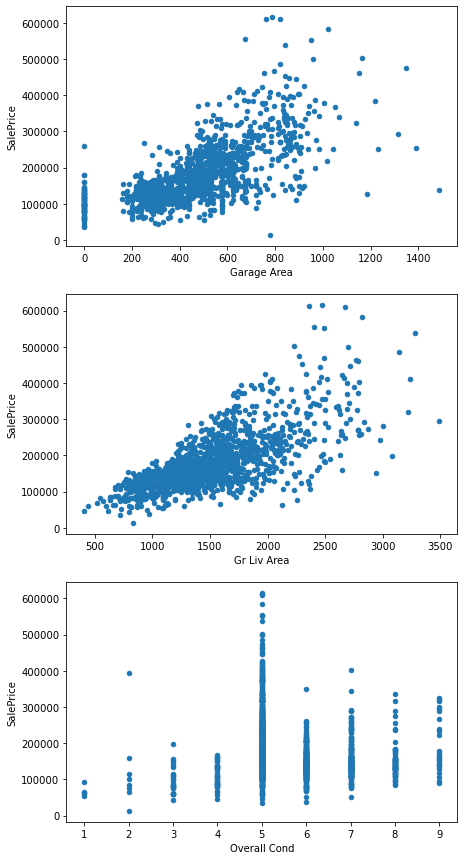

In [12]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7,15))

ax1 = fig.add_subplot(3, 1, 1)
ax2 = fig.add_subplot(3, 1, 2)
ax3 = fig.add_subplot(3, 1, 3)

train.plot(x="Garage Area", y="SalePrice", ax=ax1, kind="scatter")
train.plot(x="Gr Liv Area", y="SalePrice", ax=ax2, kind="scatter")
train.plot(x="Overall Cond", y="SalePrice", ax=ax3, kind="scatter")

plt.show()

**Les moindres carrés**

Les graphiques montrent que `Gr Liv Area` est la plus corrélée `SalePrice`. Nous pouvons le confirmer en calculant la corrélation entre les paires de ces colonnes à l'aide de la méthode `pandas.DataFrame.corr()`.

In [13]:
print(train[['Garage Area', 'Gr Liv Area', 'Overall Cond', 'SalePrice']].corr())

              Garage Area  Gr Liv Area  Overall Cond  SalePrice
Garage Area      1.000000     0.465366     -0.132401   0.662397
Gr Liv Area      0.465366     1.000000     -0.133710   0.698990
Overall Cond    -0.132401    -0.133710      1.000000  -0.099395
SalePrice        0.662397     0.698990     -0.099395   1.000000


In [14]:
#Saleprice = a1 ∗ Gr Liv Area + a0

Utilisons maintenant scikit-learn pour trouver les valeurs de paramètres optimales pour notre modèle. La bibliothèque scikit-learn a été conçue pour échanger et essayer facilement différents modèles. Parce que nous sommes familiers avec le flux de travail scikit-learn pour les k  plus proches voisins, le passage à l'utilisation de la régression linéaire est simple.

Au lieu de travailler avec la classe `sklearn.neighbors.KNeighborsRegressors`, nous travaillons avec la classe `sklearn.linear_model.LinearRegression`. La classe `LinearRegression` a également sa propre méthode `fit()`. Cependant, les attributs `coef_ ` et `intercept_`  sont spécifiques à ce modèle, qui renvoient a1 et a0.

In [15]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train[['Gr Liv Area']], train['SalePrice'])
print(lr.coef_)
print(lr.intercept_)

a0 = lr.intercept_
a1 = lr.coef_

[116.86624683]
5366.821710056043


**Le modèle** : y=116.86624683x1+5366.82171006

Nous pouvons maintenant utiliser la méthode `predict()` pour prédire les étiquettes à l'aide des données d'entraînement et les comparer avec les étiquettes réelles. 

Pour mesurer l'ajustement, nous pouvons utiliser l'erreur quadratique moyenne (MSE). Effectuons également une validation simple en faisant des prédictions sur l'ensemble de test et calculons également la valeur MSE pour ces prédictions.

In [16]:
import numpy as np

lr = LinearRegression()
lr.fit(train[['Gr Liv Area']], train['SalePrice'])

from sklearn.metrics import mean_squared_error

train_predictions = lr.predict(train[['Gr Liv Area']])
test_predictions = lr.predict(test[['Gr Liv Area']])

train_mse = mean_squared_error(train_predictions, train['SalePrice'])
test_mse = mean_squared_error(test_predictions, test['SalePrice'])

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print(train_rmse)
print(test_rmse)

56034.362001412796
57088.25161263909


**Cas multivarié**

Entraînons un modèle à l'aide des colonnes suivantes du jeu de données pour voir comment les valeurs RMSE d'entraînement et de test sont améliorées: 

   * `Overall Cond`
   * `Gr Liv Area`



In [17]:
cols = ['Overall Cond', 'Gr Liv Area']
lr.fit(train[cols], train['SalePrice'])
train_predictions = lr.predict(train[cols])
test_predictions = lr.predict(test[cols])

train_rmse_2 = np.sqrt(mean_squared_error(train_predictions, train['SalePrice']))
test_rmse_2 = np.sqrt(mean_squared_error(test_predictions, test['SalePrice']))

print(train_rmse_2)
print(test_rmse_2)

56032.398015258674
57066.90779448559


## II.3. La régression logistique

Chaque année, des lycéens et des étudiants postulent dans diverses universités à différents programmes. Chaque élève a un ensemble unique de résultats de test, de notes et de parcours. D'une manière ou d'une autre, les comités d'admission doivent décider quels candidats accepter ou rejeter de leur programme. Dans ce cas, un algorithme de classification binaire peut être utilisé pour accepter ou rejeter des candidats. Pour comprendre les concepts de classification, nous essaierons de prédire si un candidat sera admis à un programme d'études supérieures dans une université.

Nous travaillerons avec un ensemble de données contenant des données sur 644 candidats avec les colonnes suivantes:

* `gre`: score du candidat à l'examen du dossier d'études supérieures, un test généralisé destiné aux futurs étudiants diplômés. Le score varie de 200 à 800.
* `gpa` :  moyenne pondérée cumulative - Continu entre 0,0 et 4,0.
* `admit`: valeur binaire - Valeur binaire, 0 ou 1, où 1 signifie que le candidat a été admis au programme et 0 signifie que le candidat a été rejeté.

Bien que nous puissions utiliser à la fois les colonnes `gpa` et `gre` pour prédire la colonne `admit`, nous nous concentrerons sur l'utilisation de la colonne `gpa` uniquement pour simplifier les choses. 
Lisons les données dans Pandas et visualisons la relation entre `gpa` et `admit`.

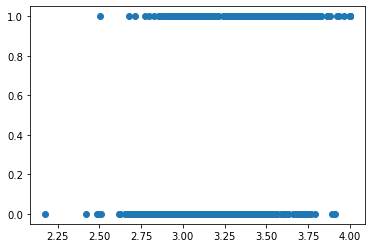

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

admissions = pd.read_csv("admissions.csv")
plt.scatter(admissions['gpa'], admissions['admit'])
plt.show()

### Fonction logistique

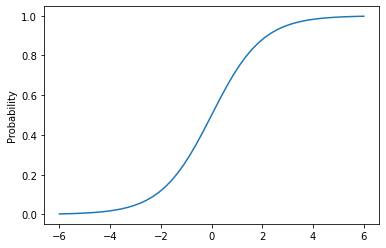

In [19]:
import numpy as np

# Logistic Function
def logistic(x):
    # np.exp(x) raises x to the exponential power, ie e^x. e ~= 2.71828
    return np.exp(x)  / (1 + np.exp(x)) 
    
# Generate 50 real values, evenly spaced, between -6 and 6.
x = np.linspace(-6,6,50, dtype=float)

# Transform each number in t using the logistic function.
y = logistic(x)

# Plot the resulting data.
plt.plot(x, y)
plt.ylabel("Probability")
plt.show()

**Entrainement du modèle**

L'entraînement d'un modèle de régression logistique dans scikit-learn est similaire à l'entraînement d'un modèle de régression linéaire, avec la principale différence que nous utilisons la classe `LogisticRegression` au lieu ` LinearRegression`. 

In [20]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(admissions[["gpa"]], admissions["admit"])

LogisticRegression()

Nous avons mentionné précédemment que la sortie d'un modèle de régression logistique est la probabilité que la ligne soit étiquetée True, ou dans notre cas 1. Nous pouvons utiliser le modèle entraîné pour renvoyer la probabilité prédite pour chaque ligne des données d'apprentissage.

Pour renvoyer la probabilité prédite, on utilise la méthode `predict_proba`. Le seul paramètre requis pour cette méthode est la matrice `num_features` par `num_sample` des observations pour lesquelles scikit-learn doit renvoyer les probabilités prédites. Pour chaque ligne d'entrée, scikit-learn renverra un tableau NumPy avec 2 valeurs de probabilité:

   * la probabilité que la ligne soit étiquetée 0,
   * la probabilité que la ligne soit étiquetée 1.

Puisque 0 et 1 sont les 2 seules catégories possibles et représentent la totalité de l'espace de résultats, ces 2 probabilités ajouteront toujours jusqu'à 1.

In [21]:
probabilities = logistic_model.predict_proba(admissions[["gpa"]])
# ---------Probability that the row belongs to label `0`.
#probabilities[:,0]
#----------- Probabililty that the row belongs to label `1`.
#probabilities[:,1]

**Exercice**

1. Utiliser la méthode `predict_proba` de  `LogisticRegression`  pour renvoyer les probabilités prévues pour les données de la colonne `gpa`. Affecter les probabilités renvoyées à `pred_probs`.

2. Créer et afficher un nuage de points à l'aide de la fonction `scatter` de  Matplotlib où:
        * l'axe des abscisses correspond aux valeurs de la colonne `gpa`,
        * l'axe des y est la probabilité d'être classé comme étiquette 1.



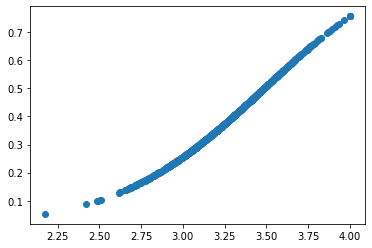

In [22]:
logistic_model = LogisticRegression()
logistic_model.fit(admissions[["gpa"]], admissions["admit"])

pred_probs = logistic_model.predict_proba(admissions[["gpa"]])
plt.scatter(admissions["gpa"], pred_probs[:,1])

Le nuage de points suggère une relation linéaire entre les valeurs `gpa` et la probabilité d'être admis. En effet, la régression logistique n'est en réalité qu'une version adaptée de la régression linéaire pour les problèmes de classification. Elles permettent de saisir les relations linéaires entre les variables indépendantes et la variable dépendante.

Utilisons maintenant la méthode `predict` pour renvoyer les prédictions d'étiquette pour chaque ligne de notre ensemble de données d'entraînement.

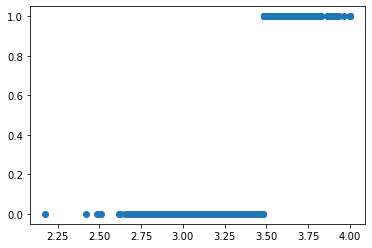

In [23]:
logistic_model = LogisticRegression()
logistic_model.fit(admissions[["gpa"]], admissions["admit"])
fitted_labels = logistic_model.predict(admissions[["gpa"]])
plt.scatter(admissions["gpa"], fitted_labels)